# TP04 - HMM

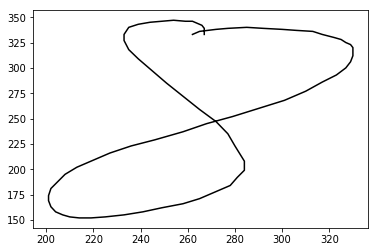

In [6]:
import numpy as np
from unipen import *

train_data, train_labels = loadUnipenData("pendigits-orig.tra")
test_data, test_labels = loadUnipenData("pendigits-orig.tes")

plotUnipen(train_data[0])